# Projeto: Comparar Selic e IPCA, além de outras análises
Autor: [Mailson Vieira Passos](https://www.linkedin.com/in/mailson-p-92909928a/)

**Objetivo**
* Coletar dados da Selic no site do [Banco Central do Brasil](https://www.bcb.gov.br/controleinflacao/historicotaxasjuros)
* Trabalhar os dados (limpeza e tranformação) da Selic
* Produzir gráficos da Selic
* Produzir algumas estatísticas
* Coletar dados de IPCA no site [IBGE](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=downloads)
* Abrir o arquivo no Excel, montar uma tabela única e salvar no formato xlsc
* Trabalhar os dados do IPCA
* Plotar gráficos de IPCA
* Comparar com Selic e IPCA

In [6]:
from selenium import webdriver

In [7]:
# vou usar selenium pois a tabela é dinâmica
driver = webdriver.Firefox()

url = "https://www.bcb.gov.br/controleinflacao/historicotaxasjuros"

In [8]:
driver.get(url)
print(driver.title)

Taxas de juros básicas – Histórico


In [9]:
table = driver.find_element('id', 'historicotaxasjuros')
rows = table.find_elements('tag name', "tr")

In [14]:
content = []
for row in rows:
    cols = row.find_elements('tag name', "td")
    content.append([])
    for col in cols:
        content[-1].append(col.text) 
content = content[2:]
driver.quit()

In [15]:
import pandas as pd

table_cols =['Reuniao_Num', 'Reuniao_Data', 'Reuniao_Vies', 'Periodo_De_Vigencia', 'Meta_Selic_(%a.a)', 'TBAN_(%a.m)', 'Taxa_Selic_(%)', 'Taxa_Selic_(%a.a)']
df = pd.DataFrame(content, index = None, columns = table_cols)
df.head()

,Reuniao_Num,Reuniao_Data,Reuniao_Vies,Periodo_De_Vigencia,Meta_Selic_(%a.a),TBAN_(%a.m),Taxa_Selic_(%),Taxa_Selic_(%a.a)
0,258º,01/11/2023,,03/11/2023 -,"12,25",,,
1,257º,20/09/2023,,21/09/2023 - 02/11/2023,"12,75",,"1,38","12,65"
2,256º,02/08/2023,,03/08/2023 - 20/09/2023,"13,25",,"1,68","13,15"
3,255º,21/06/2023,,22/06/2023 - 02/08/2023,"13,75",,"1,53","13,65"
4,254º,03/05/2023,,04/05/2023 - 21/06/2023,"13,75",,"1,74","13,65"


In [16]:
#Vou dividir o periodo de vigencia em duas colunas e incluí um espaço para padronizar o split
df_splitted = df.copy(deep = True)
df_splitted.at[0,'Periodo_De_Vigencia'] = df_splitted.at[0,'Periodo_De_Vigencia'] + ' '
df_splitted[['Vigencia_Inicio', 'Vigencia_Fim']] = df_splitted['Periodo_De_Vigencia'].str.split(' - ', expand =  True)
display(df_splitted.head(), df_splitted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Reuniao_Num          266 non-null    object
 1   Reuniao_Data         266 non-null    object
 2   Reuniao_Vies         266 non-null    object
 3   Periodo_De_Vigencia  266 non-null    object
 4   Meta_Selic_(%a.a)    266 non-null    object
 5   TBAN_(%a.m)          266 non-null    object
 6   Taxa_Selic_(%)       266 non-null    object
 7   Taxa_Selic_(%a.a)    266 non-null    object
 8   Vigencia_Inicio      266 non-null    object
 9   Vigencia_Fim         266 non-null    object
dtypes: object(10)
memory usage: 20.9+ KB


,Reuniao_Num,Reuniao_Data,Reuniao_Vies,Periodo_De_Vigencia,Meta_Selic_(%a.a),TBAN_(%a.m),Taxa_Selic_(%),Taxa_Selic_(%a.a),Vigencia_Inicio,Vigencia_Fim
0,258º,01/11/2023,,03/11/2023 -,"12,25",,,,03/11/2023,
1,257º,20/09/2023,,21/09/2023 - 02/11/2023,"12,75",,"1,38","12,65",21/09/2023,02/11/2023
2,256º,02/08/2023,,03/08/2023 - 20/09/2023,"13,25",,"1,68","13,15",03/08/2023,20/09/2023
3,255º,21/06/2023,,22/06/2023 - 02/08/2023,"13,75",,"1,53","13,65",22/06/2023,02/08/2023
4,254º,03/05/2023,,04/05/2023 - 21/06/2023,"13,75",,"1,74","13,65",04/05/2023,21/06/2023


None

In [17]:
# chequei e deu erro, então decidi procurar o(s) culpado(s)
Reuniao_Num_bool = df_splitted.Reuniao_Num.str.replace('º', '').str.isnumeric()
display(df_splitted.Reuniao_Num[~Reuniao_Num_bool])

182    76º ex.
238    28º ex.
248    18º ex.
Name: Reuniao_Num, dtype: object

In [18]:
#transformando os tipos para tipos numericos
num_cols = len(df_splitted.columns)

for i in range(num_cols):
    df_splitted[df_splitted.columns[i]] = df_splitted[df_splitted.columns[i]].str.replace(',', '.') 
    if df_splitted.columns[i] == 'Reuniao_Num':
        df_splitted[df_splitted.columns[i]] = df_splitted[df_splitted.columns[i]].str.split('º').str[0]
    if i < num_cols - 2:
        df_splitted[df_splitted.columns[i]] = pd.to_numeric(df_splitted[df_splitted.columns[i]], errors = 'ignore')

display(df_splitted.head(), df_splitted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reuniao_Num          266 non-null    int64  
 1   Reuniao_Data         266 non-null    object 
 2   Reuniao_Vies         266 non-null    object 
 3   Periodo_De_Vigencia  266 non-null    object 
 4   Meta_Selic_(%a.a)    266 non-null    float64
 5   TBAN_(%a.m)          29 non-null     float64
 6   Taxa_Selic_(%)       265 non-null    float64
 7   Taxa_Selic_(%a.a)    265 non-null    float64
 8   Vigencia_Inicio      266 non-null    object 
 9   Vigencia_Fim         266 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 20.9+ KB


,Reuniao_Num,Reuniao_Data,Reuniao_Vies,Periodo_De_Vigencia,Meta_Selic_(%a.a),TBAN_(%a.m),Taxa_Selic_(%),Taxa_Selic_(%a.a),Vigencia_Inicio,Vigencia_Fim
0,258,01/11/2023,,03/11/2023 -,12.25,NaN,NaN,NaN,03/11/2023,
1,257,20/09/2023,,21/09/2023 - 02/11/2023,12.75,NaN,1.38,12.65,21/09/2023,02/11/2023
2,256,02/08/2023,,03/08/2023 - 20/09/2023,13.25,NaN,1.68,13.15,03/08/2023,20/09/2023
3,255,21/06/2023,,22/06/2023 - 02/08/2023,13.75,NaN,1.53,13.65,22/06/2023,02/08/2023
4,254,03/05/2023,,04/05/2023 - 21/06/2023,13.75,NaN,1.74,13.65,04/05/2023,21/06/2023


None

In [19]:
# Usei uma data placeholder na vigencia fim na na primeira instancia para mudar o tipo
from datetime import datetime

df_splitted.iat[0,-1] = datetime.today().strftime('%d/%m/%Y')
for i in [1, num_cols-2, num_cols-1]:
    df_splitted[df_splitted.columns[i]] = pd.to_datetime(df_splitted[df_splitted.columns[i]], format="%d/%m/%Y")
display(df_splitted.info(), df_splitted.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reuniao_Num          266 non-null    int64         
 1   Reuniao_Data         258 non-null    datetime64[ns]
 2   Reuniao_Vies         266 non-null    object        
 3   Periodo_De_Vigencia  266 non-null    object        
 4   Meta_Selic_(%a.a)    266 non-null    float64       
 5   TBAN_(%a.m)          29 non-null     float64       
 6   Taxa_Selic_(%)       265 non-null    float64       
 7   Taxa_Selic_(%a.a)    265 non-null    float64       
 8   Vigencia_Inicio      266 non-null    datetime64[ns]
 9   Vigencia_Fim         266 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(1), object(2)
memory usage: 20.9+ KB


None

,Reuniao_Num,Reuniao_Data,Reuniao_Vies,Periodo_De_Vigencia,Meta_Selic_(%a.a),TBAN_(%a.m),Taxa_Selic_(%),Taxa_Selic_(%a.a),Vigencia_Inicio,Vigencia_Fim
0,258,2023-11-01,,03/11/2023 -,12.25,NaN,NaN,NaN,2023-11-03,2023-11-30
1,257,2023-09-20,,21/09/2023 - 02/11/2023,12.75,NaN,1.38,12.65,2023-09-21,2023-11-02
2,256,2023-08-02,,03/08/2023 - 20/09/2023,13.25,NaN,1.68,13.15,2023-08-03,2023-09-20
3,255,2023-06-21,,22/06/2023 - 02/08/2023,13.75,NaN,1.53,13.65,2023-06-22,2023-08-02
4,254,2023-05-03,,04/05/2023 - 21/06/2023,13.75,NaN,1.74,13.65,2023-05-04,2023-06-21


In [20]:
#filtrando as colunas e deixando apenas as de interesse
df_filtered = df_splitted.copy(deep= True)
df_filtered = df_filtered[['Meta_Selic_(%a.a)', 'Taxa_Selic_(%)', 'Taxa_Selic_(%a.a)', 'Vigencia_Inicio', 'Vigencia_Fim']]
df_filtered.head()

,Meta_Selic_(%a.a),Taxa_Selic_(%),Taxa_Selic_(%a.a),Vigencia_Inicio,Vigencia_Fim
0,12.25,NaN,NaN,2023-11-03,2023-11-30
1,12.75,1.38,12.65,2023-09-21,2023-11-02
2,13.25,1.68,13.15,2023-08-03,2023-09-20
3,13.75,1.53,13.65,2023-06-22,2023-08-02
4,13.75,1.74,13.65,2023-05-04,2023-06-21


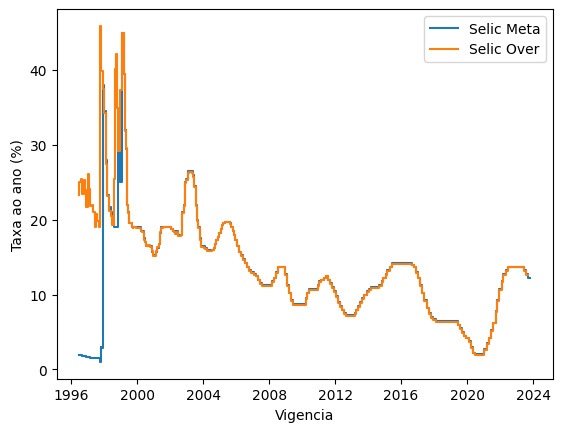

In [21]:
#plot da relação entre a selic meta e a selic over
import matplotlib.pyplot as plt

plt.step(df_filtered['Vigencia_Inicio'], df_filtered['Meta_Selic_(%a.a)'], where='post', label = 'Selic Meta')
plt.step(df_filtered['Vigencia_Inicio'], df_filtered['Taxa_Selic_(%a.a)'], where='post', label = 'Selic Over')
plt.ylabel('Taxa ao ano (%)')
plt.xlabel('Vigencia')
plt.legend()
plt.show()

In [22]:
#aqui temos um problema: a data de vigencia da instacia 248 é anterior a da instacia 249
import numpy as np

Vig_In_issue = np.diff(df_filtered.Vigencia_Inicio.values) > pd.Timedelta( 0 )
Vig_In_issue_idx =  df_filtered.Vigencia_Inicio[ : -1 ][Vig_In_issue].index[ 0 ]
df_splitted.iloc[Vig_In_issue_idx - 2: Vig_In_issue_idx + 3, :]

,Reuniao_Num,Reuniao_Data,Reuniao_Vies,Periodo_De_Vigencia,Meta_Selic_(%a.a),TBAN_(%a.m),Taxa_Selic_(%),Taxa_Selic_(%a.a),Vigencia_Inicio,Vigencia_Fim
246,20,1997-12-17,,02/01/1998 - 28/01/1998,38.00,43.00,2.43,37.47,1998-01-02,1998-01-28
247,19,1997-11-19,,01/12/1997 - 31/12/1997,2.90,3.15,2.97,39.87,1997-12-01,1997-12-31
248,18,1997-10-30,,31/10/1997 - 30/11/1997,3.05,3.23,3.18,45.67,1997-10-31,1997-11-30
249,17,1997-10-22,,01/11/1997 - 30/11/1997,1.00,1.00,3.04,45.90,1997-11-01,1997-11-30
250,16,1997-09-17,,01/10/1997 - 30/10/1997,1.58,1.78,1.53,19.05,1997-10-01,1997-10-30


In [23]:
#criando uma data central entre o inicio e o fim da vigencia
df_filtered['Diferença_Selic_Anual'] = df_filtered['Meta_Selic_(%a.a)'].sub(df_filtered['Taxa_Selic_(%a.a)'])
df_filtered['Data_Central'] = df_filtered.Vigencia_Inicio + (df_filtered.Vigencia_Fim - df_filtered.Vigencia_Inicio)/2 
df_filtered.head()

,Meta_Selic_(%a.a),Taxa_Selic_(%),Taxa_Selic_(%a.a),Vigencia_Inicio,Vigencia_Fim,Diferença_Selic_Anual,Data_Central
0,12.25,NaN,NaN,2023-11-03,2023-11-30,NaN,2023-11-16 12:00:00
1,12.75,1.38,12.65,2023-09-21,2023-11-02,0.1,2023-10-12 00:00:00
2,13.25,1.68,13.15,2023-08-03,2023-09-20,0.1,2023-08-27 00:00:00
3,13.75,1.53,13.65,2023-06-22,2023-08-02,0.1,2023-07-12 12:00:00
4,13.75,1.74,13.65,2023-05-04,2023-06-21,0.1,2023-05-28 00:00:00


Text(0, 0.5, 'Diferença Selic Meta e Selic Over')

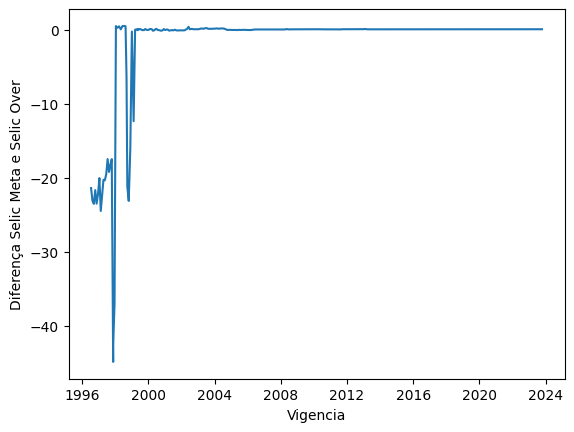

In [28]:
plt.plot(df_filtered.Data_Central, df_filtered.Diferença_Selic_Anual)
plt.xlabel('Vigencia')
plt.ylabel('Diferença Selic Meta e Selic Over')

In [25]:
#plot interativo com altair
import altair as alt

alt.Chart(df_filtered).mark_line().encode(
    x='Data_Central',
    y='Diferença_Selic_Anual'
).interactive(
).properties(
    width=500,
    height=300
)

alt.Chart(...)

Utilizando dados a partir de 2000

In [26]:
# a diferença média anual
df_filtered_2k = df_filtered[df_filtered['Vigencia_Inicio'] > '2000-01-01']
df_2k_peryear = df_filtered_2k[['Data_Central', 'Diferença_Selic_Anual']].groupby(df_filtered_2k.Data_Central.dt.year).mean()
df_2k_peryear

,Data_Central,Diferença_Selic_Anual
Data_Central,,
2000,2000-06-28 13:50:46.153846144,0.028462
2001,2001-06-19 22:00:00.000000000,-0.023333
2002,2002-06-29 12:00:00.000000000,0.096154
2003,2003-06-20 20:00:00.000000000,0.177500
2004,2004-06-18 04:00:00.000000000,0.141667
2005,2005-06-18 12:00:00.000000000,0.007500
2006,2006-06-26 20:00:00.000000000,0.045556
2007,2007-07-21 03:00:00.000000000,0.070000
2008,2008-07-23 12:00:00.000000000,0.087500


<Axes: xlabel='Diferença_Selic_Anual', ylabel='Proportion'>

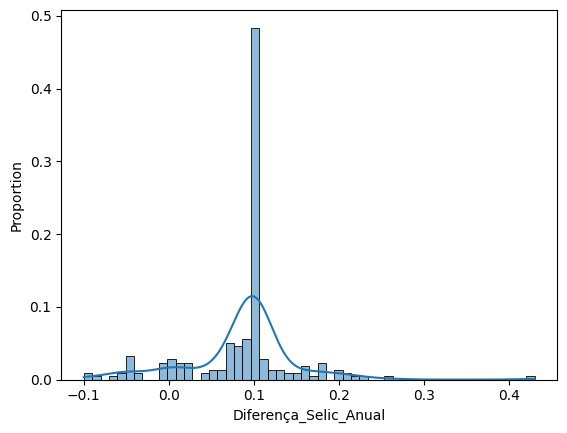

In [46]:
mandatos_pres = {Lula: pd.date_range(start='1/1/2018', end='1/08/2018'),
                 Bolsonaro: pd.date_range(start='1/1/2018', end='1/08/2018'),
                 Temer: pd.date_range(start='1/1/2018', end='1/08/2018'),
                 Dilma: pd.date_range(start='1/1/2018', end='1/08/2018'),
                 Lula: pd.date_range(start='1/1/2018', end='1/08/2018'),
                 FHC: pd.date_range(start='1/1/2018', end='1/08/2018')
                }

In [89]:
ipca_df = pd.read_excel('ipca_202310SerieHist_edit.xlsx')
ipca_df.head()

,Ano,MÊS,Número Índice,Variação Mensal,Variação Trimensal,Variação Mensal2,Variação Anual,IPCA acumulado (12 meses)
0,1994.0,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
1,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
2,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
3,NaN,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
4,NaN,MAI,581.49,44.03,193.36,695.71,481.49,4331.19


In [90]:
for i in range(len(ipca_df['Ano'])):
    if not np.isnan(ipca_df['Ano'].iat[i]):
        ipca_ano = ipca_df['Ano'].iat[i]
    else:
        ipca_df['Ano'].iat[i] = ipca_ano
ipca_df

,Ano,MÊS,Número Índice,Variação Mensal,Variação Trimensal,Variação Mensal2,Variação Anual,IPCA acumulado (12 meses)
0,1994.0,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
1,1994.0,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
2,1994.0,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
3,1994.0,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
4,1994.0,MAI,581.49,44.03,193.36,695.71,481.49,4331.19
...,...,...,...,...,...,...,...,...
353,2023.0,JUN,6659.95,-0.08,0.76,2.87,2.87,3.16
354,2023.0,JUL,6667.94,0.12,0.27,2.45,2.99,3.99
355,2023.0,AGO,6683.28,0.23,0.27,1.83,3.23,4.61
356,2023.0,SET,6700.66,0.26,0.61,1.38,3.50,5.19


In [92]:
meses_num = {'JAN':1, 'FEV':2, 'MAR':3, 'ABR':4, 'MAI':5, 'JUN':6, 'JUL':7, 'AGO':8, 'SET':9, 'OUT':10, 'NOV':11, 'DEZ':12}
ipca_df['Mês'] = ipca_df['MÊS'].map(meses_num)
ipca_df['Ano'] = ipca_df['Ano'].astype('int') 
ipca_df.head()

,Ano,MÊS,Número Índice,Variação Mensal,Variação Trimensal,Variação Mensal2,Variação Anual,IPCA acumulado (12 meses),Mês
0,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84,1
1,1994,FEV,198.22,40.27,171.24,568.17,98.22,3035.71,2
2,1994,MAR,282.96,42.75,182.96,602.93,182.96,3417.39,3
3,1994,ABR,403.73,42.68,185.71,648.92,303.73,3828.49,4
4,1994,MAI,581.49,44.03,193.36,695.71,481.49,4331.19,5


In [88]:
for i in range(len(ipca_df)):
    ipca_df['data'] = datetime(year=ipca_df['Ano'].iat[i], month=ipca_df['Mês'].iat[i], day=9)

KeyError: 'Mês'

datetime.datetime(1, 2, 1, 0, 0)

datetime.datetime(2012, 2, 9, 0, 0)